<a href="https://colab.research.google.com/github/srijitabhowmik/ML/blob/main/Linear_Regression_Insurance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dataset.shape

(1338, 7)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
dataset_encoded = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'], drop_first=True)
dataset_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


What It Does:
1. Converts categorical variables (sex, smoker, region) into numerical values
2. Creates new columns for each category (except the first one, due to drop_first=True)
3. Helps in making categorical data usable for Machine Learning models

In [ ]:
X = dataset_encoded.drop(columns=['charges'])
y = dataset_encoded['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#make predictions

In [ ]:
y_pred = model.predict(X_test)

#Calculate performance metrics

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#coefficients

In [ ]:
coefficients = dict(zip(X.columns, model.coef_))
intercept = model.intercept_

mae, mse, rmse, r2, coefficients, intercept

(4181.19447375365,
 33596915.85136145,
 5796.284659276273,
 0.7835929767120724,
 {'age': 256.97570583119415,
  'bmi': 337.09255194877886,
  'children': 425.27878352429724,
  'sex_male': -18.59169164103688,
  'smoker_yes': 23651.128855761228,
  'region_northwest': -370.6773262277983,
  'region_southeast': -657.8642965646436,
  'region_southwest': -809.7993541824789},
 -11931.21905032666)

#visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
coef_df = pd.DataFrame(list(coefficients.items()), columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)

1. Feature Importance (Bar Chart of Coefficients):-
Shows how much each feature impacts insurance charges. Smoking has the biggest effect, followed by age, BMI, and children.

<ipython-input-17-b9adb71226f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


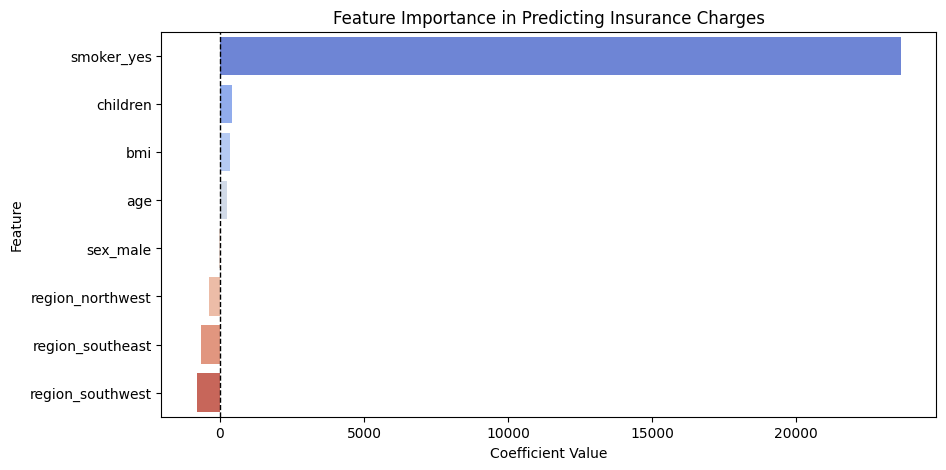

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Feature Importance in Predicting Insurance Charges')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.show()

2. Actual vs. Predicted Charges (Scatter Plot):-
Most points align with the red line (perfect predictions), but some high-cost predictions deviate.

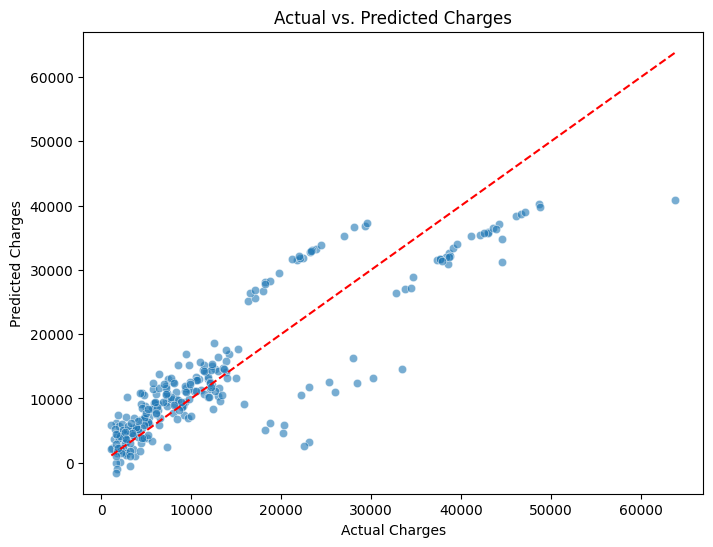

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect prediction line
plt.title('Actual vs. Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

3. Residual Plot (To check model errors):-
The residuals (errors) are mostly centered around zero, indicating a decent model fit, but there are some large errors.

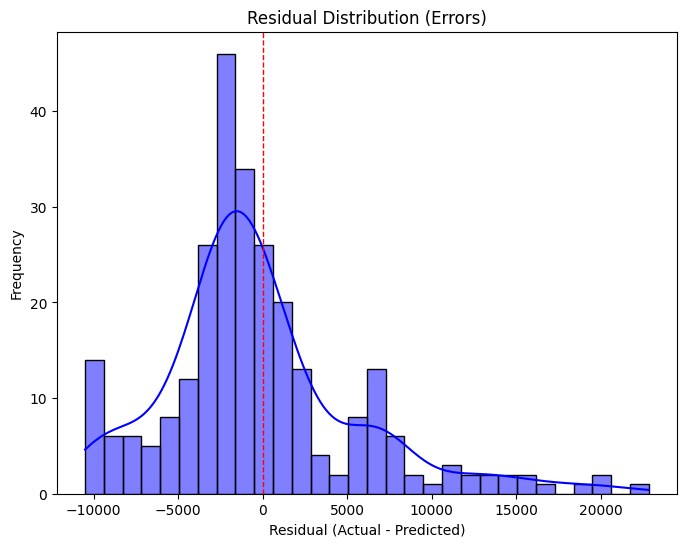

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Residual Distribution (Errors)')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.show()

#Improving the model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

Add polynomial features (degree=2 for capturing interactions)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)

Ridge()

In [ ]:
y_pred_poly = ridge_model.predict(X_test_poly)

In [ ]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

mae_poly, mse_poly, rmse_poly, r2_poly

(2729.4086999116057, 20656391.238945577, 4544.930278777176, 0.8669464733111836)

##Improved Model Results (Polynomial + Ridge Regression)

Actual vs. Predicted Charges (Scatter Plot) – To see if predictions have improved.

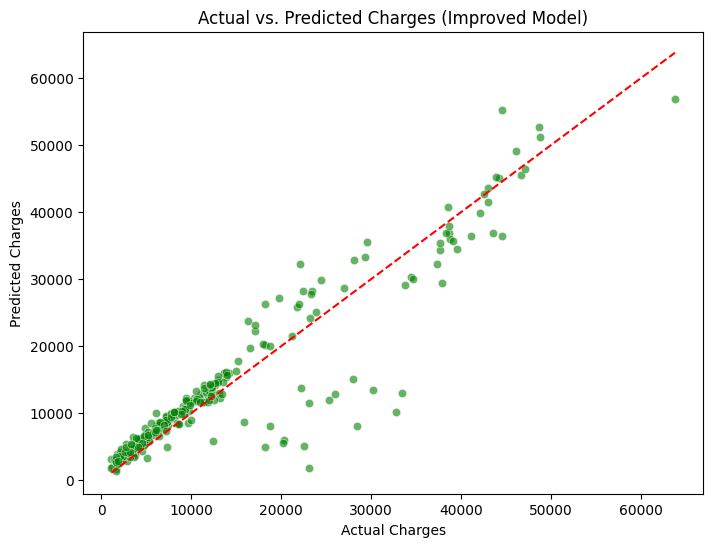

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect prediction line
plt.title('Actual vs. Predicted Charges (Improved Model)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

Residual Distribution (Histogram) – To check how errors are distributed.

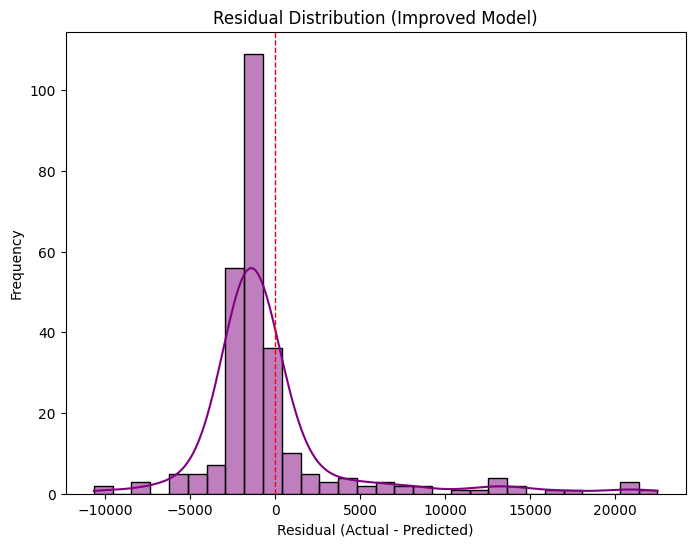

In [ ]:
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(8, 6))
sns.histplot(residuals_poly, bins=30, kde=True, color='purple')
plt.title('Residual Distribution (Improved Model)')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.show()